# Decision Tree - Splitting 3 people data into training and test datasets

In [24]:
%matplotlib inline

In [25]:
from pathlib import Path
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [26]:
#Description of features
#Average[3]: Average acceleration (for each axis)
#Standard Deviation[3]: Standard deviation (for each axis)
#Average Absolute Difference[3]: Average absolute
#difference between the value of each of the 200 readings
#within the ED and the mean value over those 200 values
#(for each axis)
#Average Resultant Acceleration[1]: Average of the square
#roots of the sum of the values of each axis squared
#over the ED
#Time Between Peaks[3]: Time in milliseconds between
#peaks in the sinusoidal waves associated with most
#activities (for each axis)
#Binned Distribution[30]: We determine the range of values
#for each axis (maximum – minimum), divide this range into
#10 equal sized bins, and then record what fraction of the
#200 values fell within each of the bins. 

In [27]:
my_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile.csv")
df = pd.read_csv(my_file)
df.head()
df.shape#(no of rows, no of columns)

(417, 46)

# Removing duplicate entries

In [28]:
df_unique = df.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.shape

(406, 46)

In [29]:
X = df_unique.values[:,2:45]

In [30]:
Y = df_unique.values[:,45]

# Splitting data into train and test

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [32]:
df_gini = DecisionTreeClassifier(criterion = 'gini')

In [33]:
df_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Feature Importances

In [34]:
feature_imp = df_gini.feature_importances_
feature_imp

array([ 0.        ,  0.        ,  0.        ,  0.02836417,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.03108436,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.10452031,  0.        ,  0.81087203,
        0.        ,  0.        ,  0.01433595,  0.        ,  0.        ,
        0.01082317,  0.        ,  0.        ])

In [12]:
main_features = []
for i in range(0,len(feature_imp)):
    if feature_imp[i] > 0:
        entry = []
        entry.append(df.columns.values[i+2])
        entry.append(feature_imp[i])
        main_features.append(entry)
main_features

[['Bin8,y', 0.014168212344099738],
 ['Bin10,y', 0.011431446540880501],
 ['TimeDiffPeaks-z', 0.058866029444859067],
 ['AvgAbsDiff-x', 0.042843571111537755],
 ['AvgAbsDiff-y', 0.82305173862661329],
 ['AvgAcc-x', 0.014195299569678937],
 ['AvgAcc-y', 0.014009740098179851],
 ['StdDev-y', 0.021433962264150945]]

In [13]:
frame = df_unique.loc[:,['AvgAbsDiff-y','AvgAbsDiff-x']]

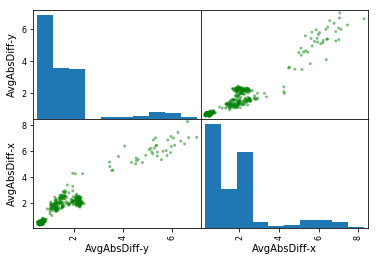

In [14]:
scatter_matrix(frame,color='g')
plt.savefig('./../Data-Visualization/images/scatter_matrix_AvgAbsDiffxy_dt_train_val_same_3.png',dpi=1000)

In [15]:
#Predicting using test data
Y_predict_gini = df_gini.predict(X_test)

In [16]:
#Calculating accuracy score
score = accuracy_score(Y_test,Y_predict_gini)
score

0.94262295081967218

In [17]:
cm = confusion_matrix(Y_test,Y_predict_gini)
cm

array([[48,  3],
       [ 4, 67]])

In [22]:
import numpy as np
from sklearn import metrics

num_predns = []

for i in range(0,len(Y_predict_gini)):
    if Y_predict_gini[i] == "walking":
        num_predns.append(0)
    else:
        num_predns.append(1)
        
num_labels = []

for i in range(0,len(Y_test)):
    if Y_test[i] == "walking":
        num_labels.append(0)
    else:
        num_labels.append(1)

predns = np.array(num_predns)
labels = np.array(num_labels)
print (type(predns))
print (type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
fpr, tpr, thresholds = metrics.roc_curve(labels, predns)
roc_auc = metrics.auc(fpr, tpr)

[ 0.          0.05633803  1.        ]


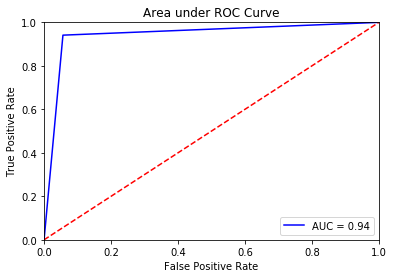

In [20]:
import matplotlib.pyplot as plt
plt.title('Area under ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()